# Summative Assessment Finals

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

rating_df=pd.read_csv('ratings.csv')
tag_df=pd.read_csv('tags.csv')
scores_df=pd.read_csv('genome-scores.csv')
movies_df=pd.read_csv('movies.csv')
link_df=pd.read_csv('links.csv')
gtag_df=pd.read_csv('genome-tags.csv')

# Number 1

In [72]:
rating_df['timestamp'] = pd.to_datetime(rating_df['timestamp'], unit='s')

rating_df['year']=rating_df['timestamp'].dt.year

rating_df

,userId,movieId,rating,timestamp,year
0,1,296,5.0,2006-05-17 15:34:04,2006
1,1,306,3.5,2006-05-17 12:26:57,2006
2,1,307,5.0,2006-05-17 12:27:08,2006
3,1,665,5.0,2006-05-17 15:13:40,2006
4,1,899,3.5,2006-05-17 12:21:50,2006
...,...,...,...,...,...
25000090,162541,50872,4.5,2009-04-28 21:16:12,2009
25000091,162541,55768,2.5,2009-04-28 20:53:18,2009
25000092,162541,56176,2.0,2009-04-28 20:31:37,2009
25000093,162541,58559,4.0,2009-04-28 21:17:14,2009


In [21]:
year=movies_df['title'].str.findall('\((\d{4})\)').str.get(0)
movies_df['year']=year

movies_df


,movieId,title,genres,season,year
0,1,Toy Story (1995),Adventure,Spring,1995
0,1,Toy Story (1995),Animation,Spring,1995
0,1,Toy Story (1995),Children,Spring,1995
0,1,Toy Story (1995),Comedy,Spring,1995
0,1,Toy Story (1995),Fantasy,Spring,1995
...,...,...,...,...,...
62420,209163,Bad Poems (2018),Drama,Summer,2018
62421,209169,A Girl Thing (2001),(no genres listed),Summer,2001
62422,209171,Women of Devil's Island (1962),Action,Summer,1962
62422,209171,Women of Devil's Island (1962),Adventure,Summer,1962


In [84]:
movies_per_year = movies_df.groupby('year').size().reset_index()
movies_per_year.columns=['year','movies per year']
movies_per_year


,year,movies per year
0,1874,1
1,1878,1
2,1880,1
3,1883,1
4,1887,1
...,...,...
130,2015,4203
131,2016,4071
132,2017,3925
133,2018,3329


In [99]:
movies_per_year['change over time'] = movies_per_year['movies per year'].pct_change() * 100

movies_per_year

,year,movies per year,change over time
0,1874,1,NaN
1,1878,1,0.000000
2,1880,1,0.000000
3,1883,1,0.000000
4,1887,1,0.000000
...,...,...,...
130,2015,4203,1.570807
131,2016,4071,-3.140614
132,2017,3925,-3.586342
133,2018,3329,-15.184713


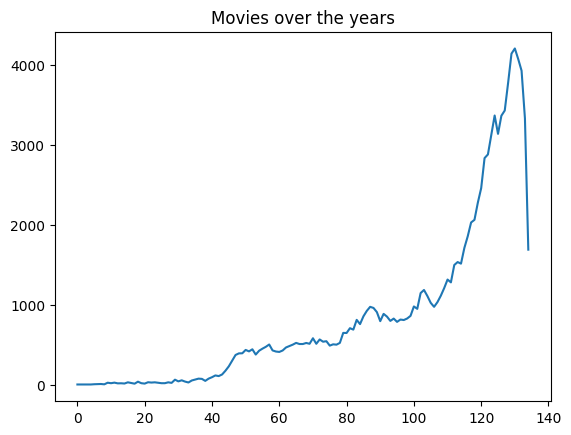

In [100]:
plt.plot(movies_per_year['movies per year'])

plt.title('Movies over the years')

plt.show()


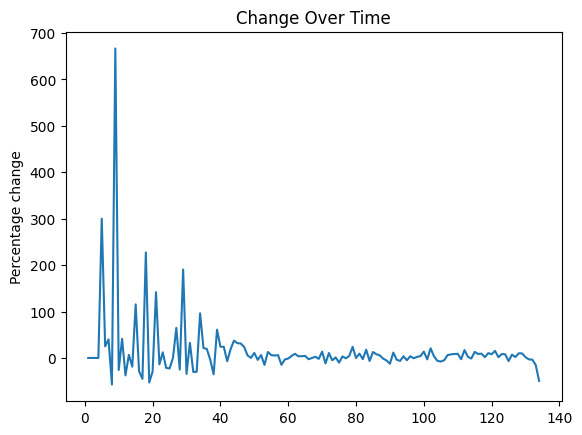

In [101]:
plt.plot(movies_per_year['change over time'])
plt.ylabel('Percentage change')

plt.title('Change Over Time')

plt.show()

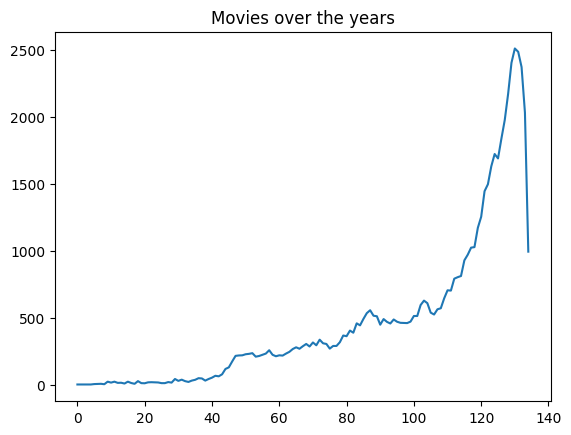

In [80]:
plt.plot(movies_genre['genres'])

plt.title('Movies over the years')

plt.show()

# Number 2


In [11]:
genresum = movies_df.groupby('genres').size().reset_index()
genresum.columns=['genres', 'value']
top_10_genres = genresum.nlargest(10, 'value')

genresum

,genres,value
0,(no genres listed),5062
1,Action,7348
2,Adventure,4145
3,Animation,2929
4,Children,2935
5,Comedy,16870
6,Crime,5319
7,Documentary,5605
8,Drama,25606
9,Fantasy,2731


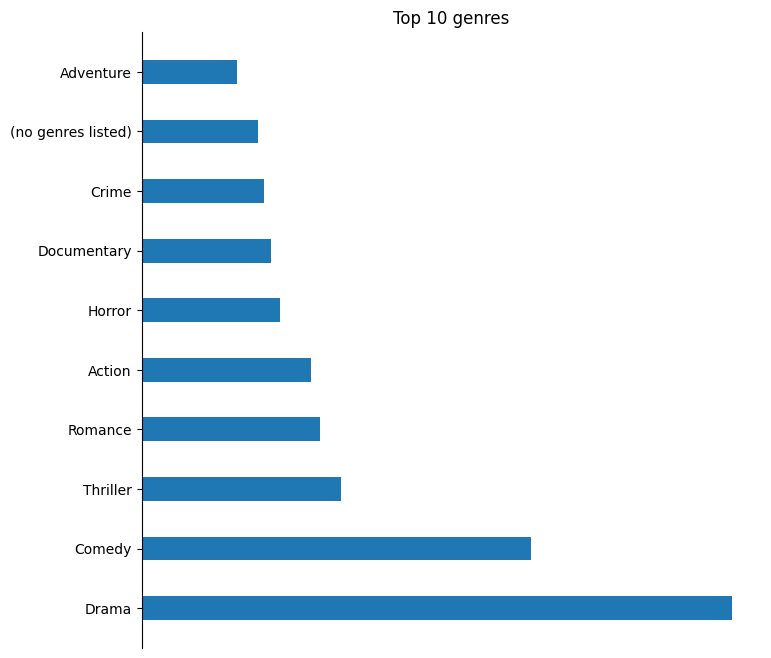

In [79]:
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(top_10_genres['genres'], top_10_genres['value'], height=0.4)
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
plt.title("Top 10 genres")



plt.show()

# Number 3

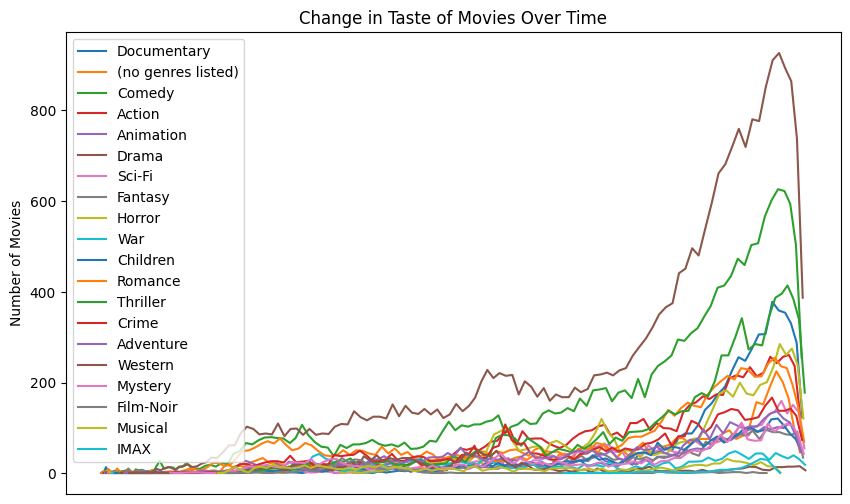

In [94]:
movies_df['genres']=movies_df['genres'].str.split('|')
movies_df = movies_df.explode('genres')


genre_per_year = movies_df.groupby(['year', 'genres']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(10,6))
for genre in genre_per_year['genres'].unique():
    genre_data = genre_per_year[genre_per_year['genres'] == genre]
    plt.plot(genre_data['count'], label=genre)

plt.ylabel('Number of Movies')
ax.xaxis.set_visible(False)

plt.title('Change in Taste of Movies Over Time')
plt.legend()
plt.show()



# Number 4

In [67]:
rating_avg = rating_df.groupby('movieId')['rating'].mean().reset_index()
rating_count = rating_df.groupby('movieId')['rating'].count()

top_20_movies = rating_count.sort_values(ascending=False).head(20).reset_index()

top_20_movies

,movieId,rating
0,356,81491
1,318,81482
2,296,79672
3,593,74127
4,2571,72674
5,260,68717
6,480,64144
7,527,60411
8,110,59184
9,2959,58773


In [68]:
movie_titles = dict(zip(movies_df['movieId'], movies_df['title']))
top_20_movies['title'] = top_20_movies['movieId'].map(movie_titles)

top_20_movies

,movieId,rating,title
0,356,81491,Forrest Gump (1994)
1,318,81482,"Shawshank Redemption, The (1994)"
2,296,79672,Pulp Fiction (1994)
3,593,74127,"Silence of the Lambs, The (1991)"
4,2571,72674,"Matrix, The (1999)"
5,260,68717,Star Wars: Episode IV - A New Hope (1977)
6,480,64144,Jurassic Park (1993)
7,527,60411,Schindler's List (1993)
8,110,59184,Braveheart (1995)
9,2959,58773,Fight Club (1999)


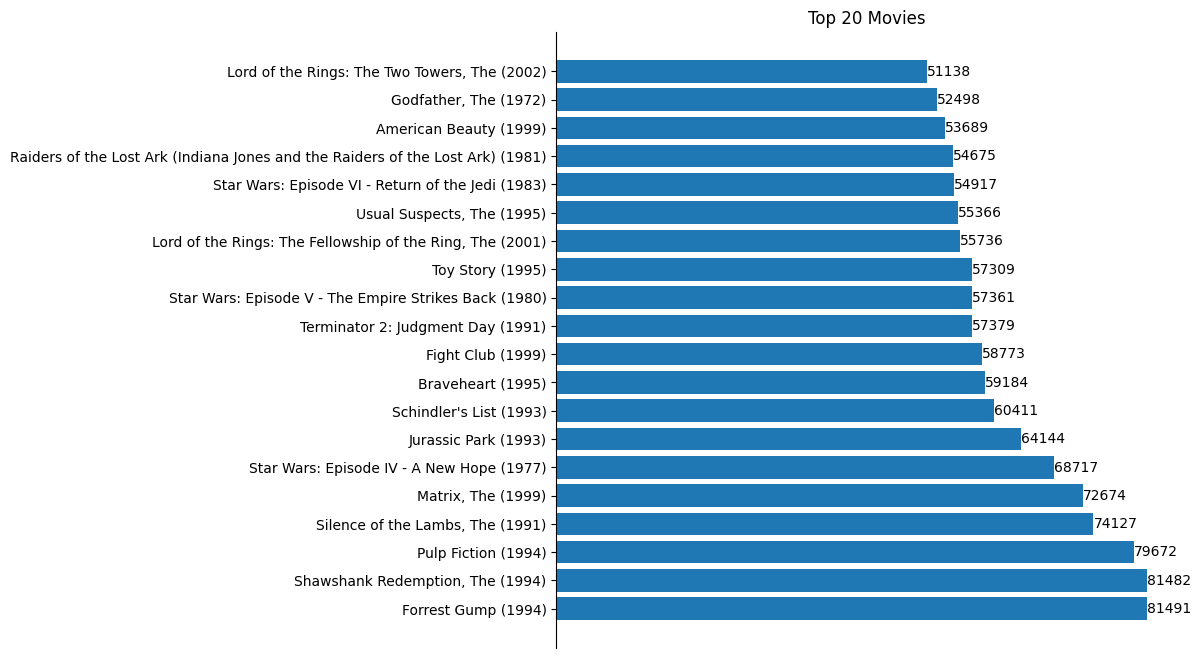

In [70]:
fig, ax = plt.subplots(figsize=(8,8))

bars=plt.barh(top_20_movies['title'], top_20_movies['rating'])
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.bar_label(bars)
plt.title("Top 20 Movies")


plt.show()

In [71]:
merged_df = pd.merge(rating_avg, rating_count, on='movieId', suffixes=('_avg', '_count'))
sorted_df = merged_df.sort_values(by='rating_count', ascending=False)

top_20_movies = sorted_df.head(20)

top_20_sorted= top_20_movies.sort_values(by='rating_avg', ascending=False)
top_20_sorted['title']=top_20_movies['movieId'].map(movie_titles)
top_20_sorted

,movieId,rating_avg,rating_count,title
314,318,4.413576,81482,"Shawshank Redemption, The (1994)"
840,858,4.324336,52498,"Godfather, The (1972)"
49,50,4.284353,55366,"Usual Suspects, The (1995)"
522,527,4.247579,60411,Schindler's List (1993)
2867,2959,4.228311,58773,Fight Club (1999)
292,296,4.188912,79672,Pulp Fiction (1994)
2480,2571,4.154099,72674,"Matrix, The (1999)"
585,593,4.151342,74127,"Silence of the Lambs, The (1991)"
1166,1196,4.144122,57361,Star Wars: Episode V - The Empire Strikes Back...
1168,1198,4.123923,54675,Raiders of the Lost Ark (Indiana Jones and the...


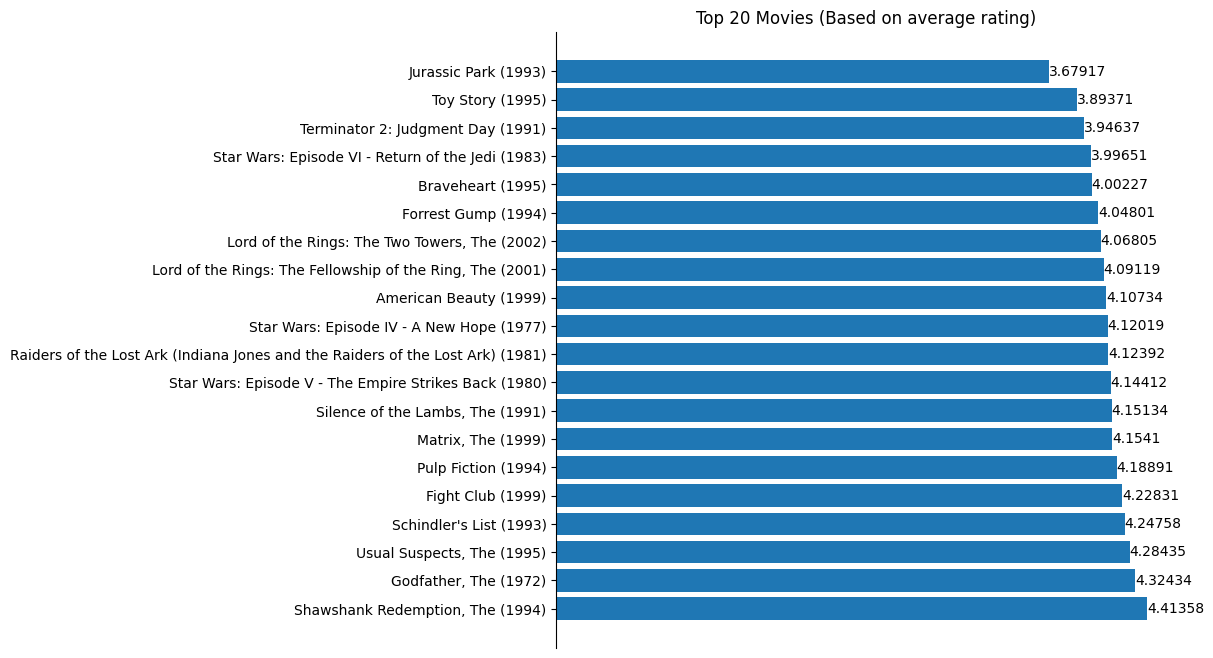

In [97]:
fig, ax = plt.subplots(figsize=(8,8))

bars=plt.barh(top_20_sorted['title'], top_20_sorted['rating_avg'])
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.bar_label(bars)
plt.title("Top 20 Movies (Based on average rating)")


plt.show()

# Number 5

In [73]:
def get_season(date):
    month = date.month
    day = date.day

    if (month == 12 and day >= 21) or (month <= 3 and day <= 20):
        return 'Winter'
    elif month >= 3 and month <= 6:
        return 'Spring'
    elif month >= 6 and month <= 9:
        return 'Summer'
    elif month >= 9 and month <= 12:
        return 'Autumn'
    
movies_df['season'] = rating_df['timestamp'].apply(get_season)

movies_df

,movieId,title,genres,season
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Spring
1,2,Jumanji (1995),Adventure|Children|Fantasy,Spring
2,3,Grumpier Old Men (1995),Comedy|Romance,Spring
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Spring
4,5,Father of the Bride Part II (1995),Comedy,Spring
...,...,...,...,...
62418,209157,We (2018),Drama,Summer
62419,209159,Window of the Soul (2001),Documentary,Summer
62420,209163,Bad Poems (2018),Comedy|Drama,Summer
62421,209169,A Girl Thing (2001),(no genres listed),Summer


In [74]:
movies_per_season = movies_df.groupby('season').size().reset_index()
largest_movie_season=movies_per_season.max()
movies_per_season



,season,0
0,Autumn,14871
1,Spring,18925
2,Summer,13731
3,Winter,11003
